In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

!pip install mlxtend
import mlxtend as ml
from mlxtend.plotting import plot_confusion_matrix

You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [22]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_train = y_train.flatten()
y_test = y_test.flatten()

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
y_train.shape

(50000,)

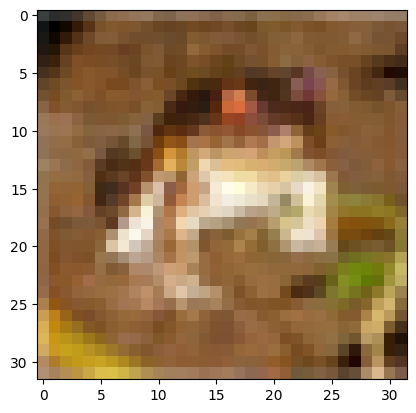

In [25]:
# images
plt.figure()
plt.imshow(X_train[0])
plt.grid(False)
plt.show()

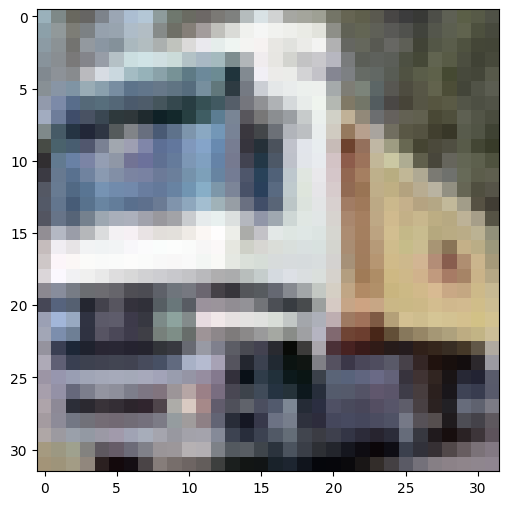

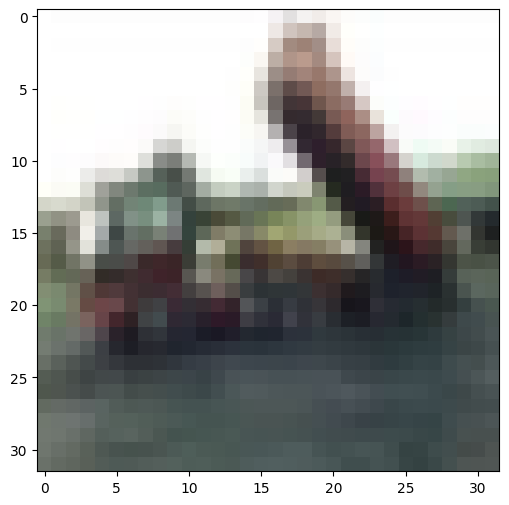

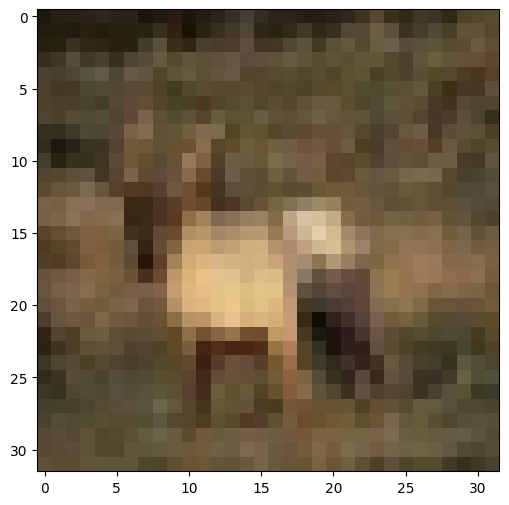

In [26]:
# plotting images 
for i in range(1,4):
  plt.figure(figsize=(12,6))
  plt.imshow(X_train[i])
  plt.grid(False)
  plt.show

In [27]:
# preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

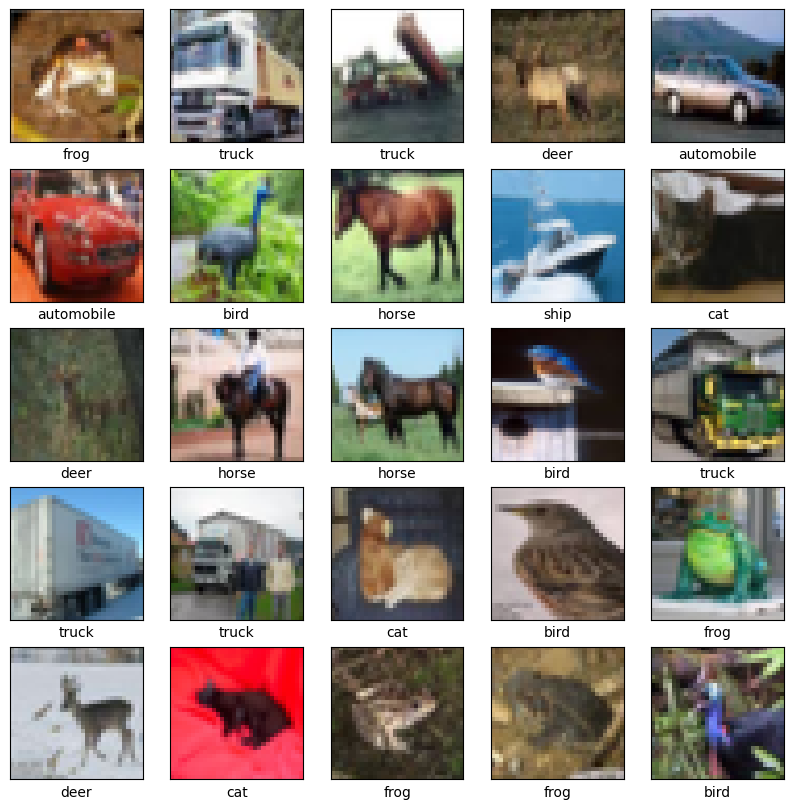

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],  cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [29]:
model = Sequential([
                  InputLayer(input_shape=(32,32,3), name='input_layer'), # input layer
                  Flatten(name='Flatten'), # flatten 1D array 
                  Dense(units=3072, activation='relu', name='hidden_layer_1'),  # hidden layer 1
                  Dense(units=3072, activation='relu', name='hidden_layer_2'),  # hidden layer 1
                  Dense(units=3072, activation='relu', name='hidden_layer_3'),  # hidden layer 2 
                  Dense(units=10, activation='softmax', name='output_layer') # output layer (predictions)
                    ])

In [30]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 3072)              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 3072)              9440256   
                                                                 
 hidden_layer_2 (Dense)      (None, 3072)              9440256   
                                                                 
 hidden_layer_3 (Dense)      (None, 3072)              9440256   
                                                                 
 output_layer (Dense)        (None, 10)                30730     
                                                                 
Total params: 28,351,498
Trainable params: 28,351,498
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.20)

Epoch 1/30
1250/1250 [==============================] - 126s 100ms/step - loss: 2.0603 - accuracy: 0.2810 - val_loss: 1.9373 - val_accuracy: 0.3237
Epoch 2/30
1250/1250 [==============================] - 121s 97ms/step - loss: 1.8704 - accuracy: 0.3544 - val_loss: 1.8545 - val_accuracy: 0.3458
Epoch 3/30
1250/1250 [==============================] - 122s 97ms/step - loss: 1.7977 - accuracy: 0.3779 - val_loss: 1.7877 - val_accuracy: 0.3805
Epoch 4/30
1250/1250 [==============================] - 124s 99ms/step - loss: 1.7515 - accuracy: 0.3909 - val_loss: 1.7550 - val_accuracy: 0.3878
Epoch 5/30
1250/1250 [==============================] - 123s 99ms/step - loss: 1.7162 - accuracy: 0.4049 - val_loss: 1.7319 - val_accuracy: 0.3894
Epoch 6/30
1250/1250 [==============================] - 123s 98ms/step - loss: 1.6867 - accuracy: 0.4141 - val_loss: 1.7042 - val_accuracy: 0.4113
Epoch 7/30
1250/1250 [==============================] - 108s 86ms/step - loss: 1.6622 - accuracy: 0.4234 - val_loss: 

In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('Loss: {}'.format(test_loss))
print('Accuracy: {}'.format(test_acc))

313/313 - 5s - loss: 1.4388 - accuracy: 0.4906 - 5s/epoch - 17ms/step
Loss: 1.4388394355773926
Accuracy: 0.49059998989105225


In [15]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 5s 17ms/step


array([[0.00998278, 0.03666262, 0.04467317, ..., 0.00180497, 0.04258368,
        0.00298245],
       [0.02491466, 0.13170587, 0.00179032, ..., 0.00107892, 0.34055048,
        0.49033317],
       [0.16129433, 0.17734197, 0.00417783, ..., 0.00307978, 0.40909916,
        0.23127583],
       ...,
       [0.00454606, 0.00437829, 0.11661925, ..., 0.02821157, 0.02020162,
        0.00655375],
       [0.02720668, 0.04169217, 0.0704161 , ..., 0.03491782, 0.00872534,
        0.03185444],
       [0.04833976, 0.01288791, 0.09494776, ..., 0.37785104, 0.01071978,
        0.03348809]], dtype=float32)

In [16]:
# Predict class
np.argmax(predictions[0])

3

In [17]:
# metrics for each class 

y_pred = np.argmax(model.predict(X_test), axis=-1)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

313/313 [==============================] - 6s 18ms/step
Accuracy: 0.4906


              precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.60      0.59      0.60      1000
           2       0.45      0.21      0.28      1000
           3       0.34      0.31      0.32      1000
           4       0.45      0.40      0.43      1000
           5       0.34      0.46      0.39      1000
           6       0.49      0.59      0.54      1000
           7       0.56      0.53      0.55      1000
           8       0.61      0.65      0.63      1000
           9       0.48      0.65      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [18]:
history.history

{'loss': [2.0602574348449707,
  1.8703750371932983,
  1.7977066040039062,
  1.7515212297439575,
  1.7161654233932495,
  1.6867263317108154,
  1.6621836423873901,
  1.6384732723236084,
  1.6165785789489746,
  1.5978106260299683,
  1.57854163646698,
  1.5618584156036377,
  1.5462270975112915,
  1.5312178134918213,
  1.515997290611267,
  1.5033608675003052,
  1.490873098373413,
  1.4781616926193237,
  1.4663221836090088,
  1.455978274345398,
  1.4432823657989502,
  1.4330689907073975,
  1.4219526052474976,
  1.4116840362548828,
  1.4006497859954834,
  1.3911195993423462,
  1.3801755905151367,
  1.3706047534942627,
  1.3609155416488647,
  1.3498543500900269],
 'accuracy': [0.2809999883174896,
  0.3543750047683716,
  0.37790000438690186,
  0.3909499943256378,
  0.40492498874664307,
  0.41405001282691956,
  0.42342498898506165,
  0.43187499046325684,
  0.4402500092983246,
  0.44415000081062317,
  0.4518499970436096,
  0.4569750130176544,
  0.4633750021457672,
  0.4670499861240387,
  0.472250

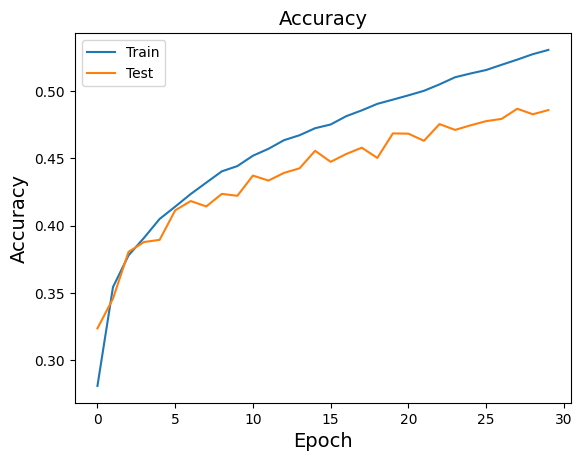

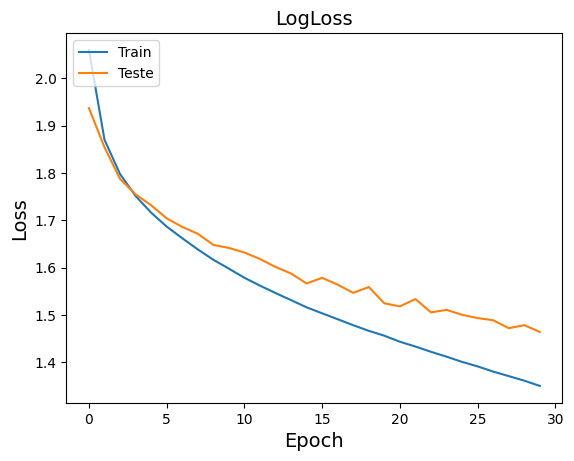

In [19]:
# Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print('\n')

# Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LogLoss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(['Train', 'Teste'], loc='upper left')
plt.show()

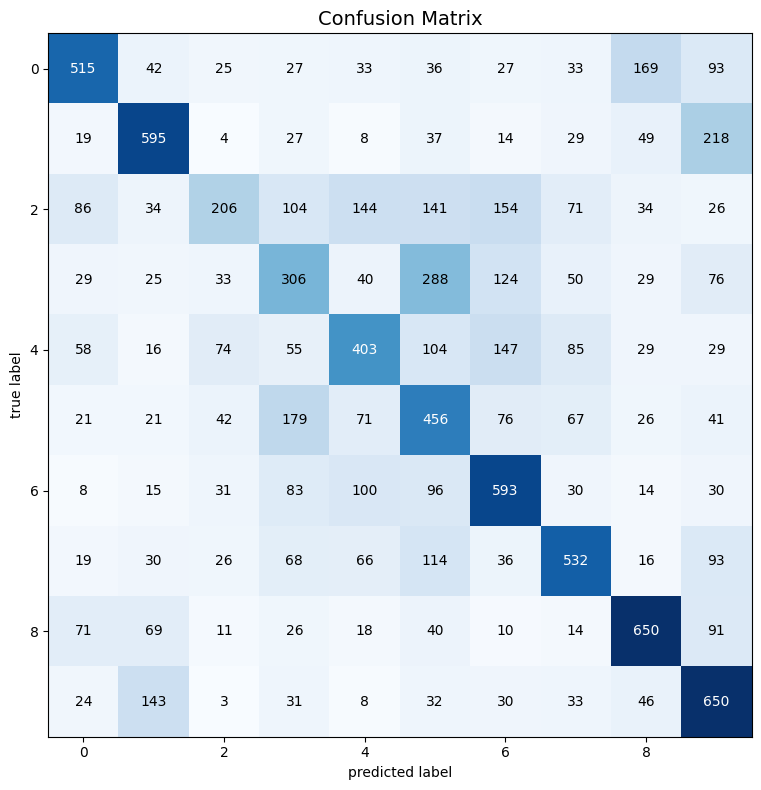

In [20]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(8,8))
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()

In [21]:
plot_model(model, "multi_layer_perceptron.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
